In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/philchodrow/Documents/teaching/ml-notes/source':
  os.chdir(r'/Users/philchodrow/Documents/teaching/ml-notes/source')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/xn/wvbwvw0d6dx46h9_2bkrknnw0000gn/T/ipykernel_46353/949127318.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/importlib/_bootstrap.py": 1669300367.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/importlib/_bootstrap_external.py": 1669300367.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/codecs.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/aliases.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/__init__.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/utf_8.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/latin_1.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/abc.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/io.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/stat.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")
np.set_printoptions(precision = 3)
pd.set_option('display.precision', 3)

url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/compas/compas.csv"
compas = pd.read_csv(url)

In [3]:
#---
cols = ["sex", "race", "decile_score", "two_year_recid"]
compas = compas[cols]
#---

In [4]:
#---
is_white = compas["race"] == "Caucasian"
is_black = compas["race"] == "African-American"

compas = compas[is_white | is_black]
compas = compas.copy()
#---

In [5]:
#---
compas.head()
#---

,sex,race,decile_score,two_year_recid
1,Male,African-American,3,1
2,Male,African-American,4,1
3,Male,African-American,8,0
6,Male,Caucasian,6,1
8,Female,Caucasian,1,0


In [6]:
#---
compas.groupby("sex").size()
#---

sex
Female    1219
Male      4931
dtype: int64

In [7]:
#---
compas.groupby("race").size()
#---

race
African-American    3696
Caucasian           2454
dtype: int64

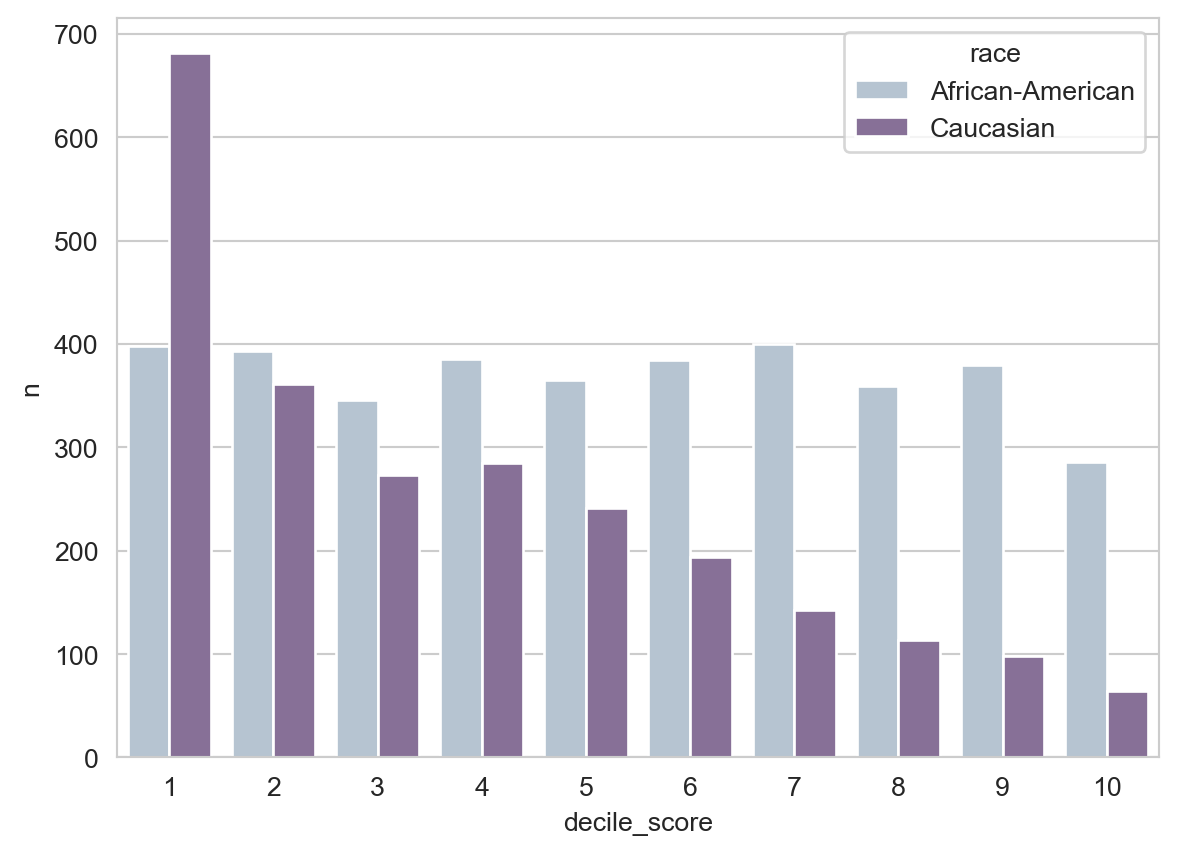

In [8]:
counts = compas.groupby(["race", "decile_score"]).size().reset_index(name = "n")
p = sns.barplot(data = counts, 
                x = "decile_score", 
                y = "n", 
                hue = "race", 
                palette = "BuPu", 
                saturation = 0.5)

In [9]:
#---
compas["two_year_recid"].mean()
#---

0.4661788617886179

In [10]:
#---
compas.groupby("race")["two_year_recid"].mean()
#---

race
African-American    0.514
Caucasian           0.394
Name: two_year_recid, dtype: float64

In [11]:
#---
compas["predicted_high_risk"] = (compas["decile_score"] > 4)
#---

In [12]:
#---
compas.groupby("race")["two_year_recid", "predicted_high_risk"].mean()
#---

/var/folders/xn/wvbwvw0d6dx46h9_2bkrknnw0000gn/T/ipykernel_46353/4230161465.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,two_year_recid,predicted_high_risk
race,,
African-American,0.514,0.588
Caucasian,0.394,0.348


In [13]:
#---
compas["correct_prediction"] = (compas["predicted_high_risk"] == compas["two_year_recid"])
compas["correct_prediction"].mean()
#---

0.6508943089430894

In [14]:
#---
compas.groupby(["race"])["correct_prediction"].mean()
#---

race
African-American    0.638
Caucasian           0.670
Name: correct_prediction, dtype: float64

In [15]:
compas.groupby(["two_year_recid"])["predicted_high_risk"].mean().reset_index()

,two_year_recid,predicted_high_risk
0,0,0.352
1,1,0.654


In [16]:
#---
compas.groupby(["two_year_recid", "race"])["predicted_high_risk"].mean().reset_index()
#---

,two_year_recid,race,predicted_high_risk
0,0,African-American,0.448
1,0,Caucasian,0.235
2,1,African-American,0.720
3,1,Caucasian,0.523


In [17]:
#---
compas.groupby(["predicted_high_risk", "race"])["two_year_recid"].mean().reset_index()
#---

,predicted_high_risk,race,two_year_recid
0,False,African-American,0.350
1,False,Caucasian,0.288
2,True,African-American,0.630
3,True,Caucasian,0.591
